In [64]:
# import packages
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['axes.linewidth'] = 2

plt.rc('xtick',labelsize = 20)
plt.rc('ytick',labelsize = 20)
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['legend.fontsize'] = 25


In [80]:
# import the data
bikes = pd.read_csv('train.csv', index_col=0, parse_dates=True)
bikes.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [66]:
bikes.info

<bound method DataFrame.info of                      season  holiday  workingday  weather   temp   atemp  \
datetime                                                                   
2011-01-01 00:00:00       1        0           0        1   9.84  14.395   
2011-01-01 01:00:00       1        0           0        1   9.02  13.635   
2011-01-01 02:00:00       1        0           0        1   9.02  13.635   
2011-01-01 03:00:00       1        0           0        1   9.84  14.395   
2011-01-01 04:00:00       1        0           0        1   9.84  14.395   
...                     ...      ...         ...      ...    ...     ...   
2012-12-19 19:00:00       4        0           1        1  15.58  19.695   
2012-12-19 20:00:00       4        0           1        1  14.76  17.425   
2012-12-19 21:00:00       4        0           1        1  13.94  15.910   
2012-12-19 22:00:00       4        0           1        1  13.94  17.425   
2012-12-19 23:00:00       4        0           1        

In [67]:
hour = bikes.index.month
day = bikes.index.day
month = bikes.index.month
year = bikes.index.year

In [63]:
hour.unique()

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='datetime')

In [82]:
bikes['weekday'] = bikes.index.weekday
bikes.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,5
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,5


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='datetime', ylabel='count'>

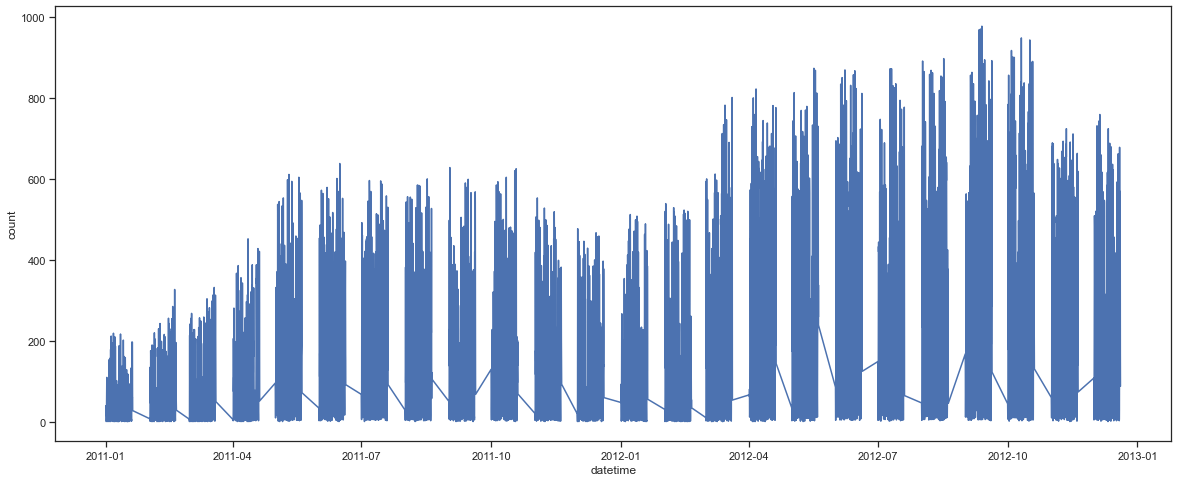

In [86]:
# plot the time correlations
sns.set(style="ticks")
x = bikes.loc['2011-01-01 00:00:00 ':'2013-01-01 00:00:00 '].index
y = bikes.loc['2011-01-01 00:00:00 ':'2013-01-01 00:00:00 ','count']
sns.lineplot(x, y)

# there is a day / week/ month /year correlation. Also weekend correlation

In [90]:
# In order to include the correlations from timestamp I will introduce new columns:
bikes['day'] = bikes.index.day
bikes.head(2)
#bikes['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [100]:
# In order to include the correlations from timestamp I will introduce new columns:
bikes['month'] = bikes.index.month
bikes.head(2)
#bikes['month'].unique()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,day,month,year
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,5,1,1,2011
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,5,1,1,2011


In [102]:
# In order to include the correlations from timestamp I will introduce new columns:
bikes['year'] = bikes.index.year
bikes.head(2)
#bikes['year'].unique()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,day,month,year
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,5,1,1,2011
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,5,1,1,2011
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,5,1,1,2011
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,5,1,1,2011
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,5,1,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-19 19:00:00,4,0,1,2,14.76,17.425,53,11.0014,17,234,251,0,19,12,2011
2011-12-19 20:00:00,4,0,1,1,16.40,20.455,40,11.0014,9,197,206,0,19,12,2011
2011-12-19 21:00:00,4,0,1,2,14.76,17.425,53,8.9981,15,112,127,0,19,12,2011


In [107]:
bikes['year'] = bikes['year'].replace({2011: 0.0, 2012: 1.0})
bikes.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,day,month,year
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,5,1,1,0.0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,5,1,1,0.0


In [108]:
bikes.insert(14, 'count', bikes.pop('count'))
bikes.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,weekday,day,month,year,count
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,5,1,1,0.0,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,5,1,1,0.0,40


In [122]:
bikes['test'] = bikes['casual'] + bikes['registered']
bikes['test'] == bikes['count']
#  the #casual + #registered = #counts 
bikes.drop(['test','count'],axis=1,inplace=True)
bikes.head(2)

KeyError: 'count'

In [ ]:
bikes.drop(['test','count'],axis=1,inplace=True)
bikes.head(2)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='datetime', ylabel='holiday'>

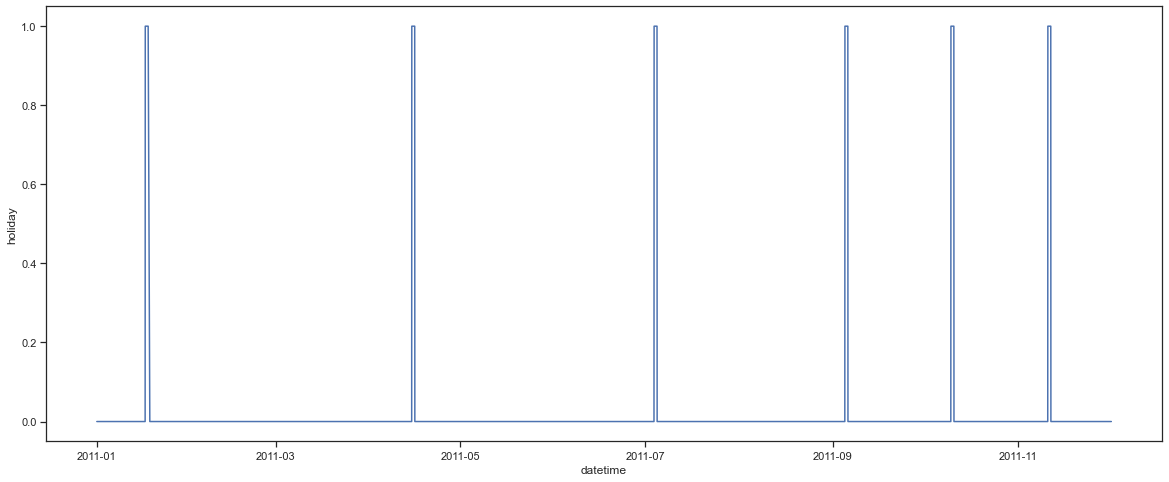

In [56]:
# plot 
sns.set(style="ticks")
x = bikes.loc['2011-01-01':'2011-12-01'].index
y = bikes.loc['2011-01-01':'2011-12-01','holiday']
sns.lineplot(x, y)

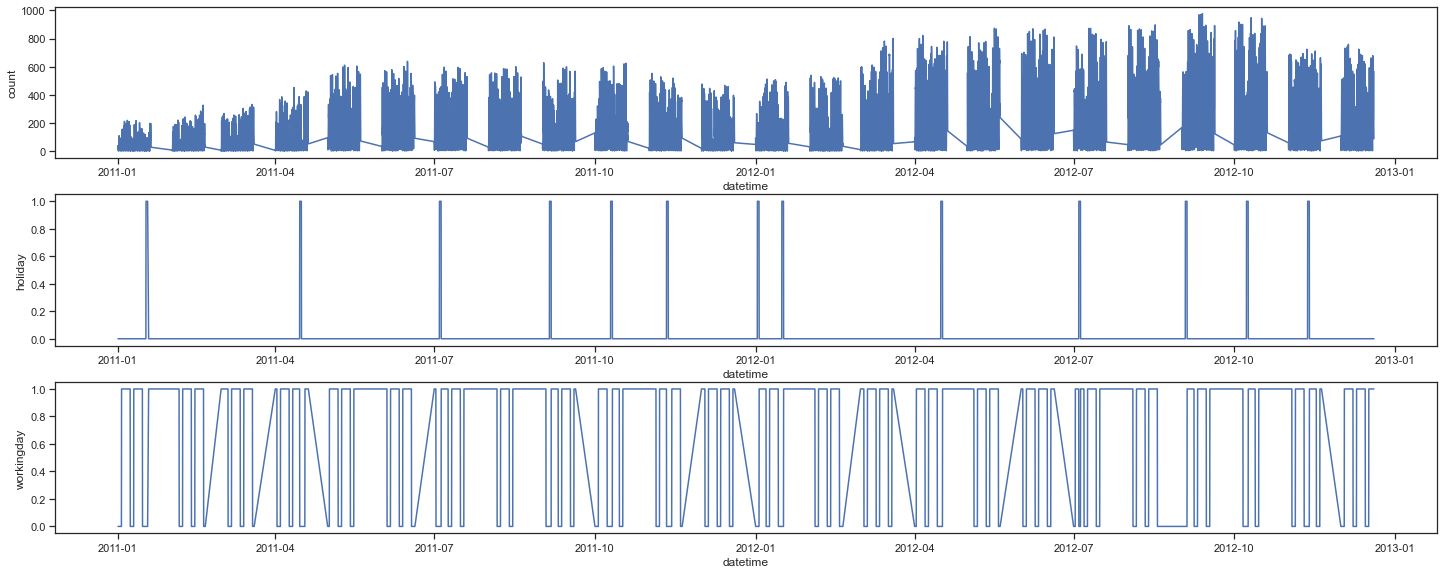

In [57]:
sns.set(style="ticks")
fig, ax = plt.subplots(3)
fig.tight_layout()

g1 = sns.lineplot(x=bikes.index, y = bikes["count"],data = bikes, ax=ax[0])
g2 = sns.lineplot(x=bikes.index, y = bikes["holiday"],data = bikes, ax=ax[1])
g3 = sns.lineplot(x=bikes.index, y = bikes["workingday"],data = bikes, ax=ax[2])

In [58]:
bikes[bikes['year']  == 2011]['workingday'].value_counts()

KeyError: 'year'

<AxesSubplot:>

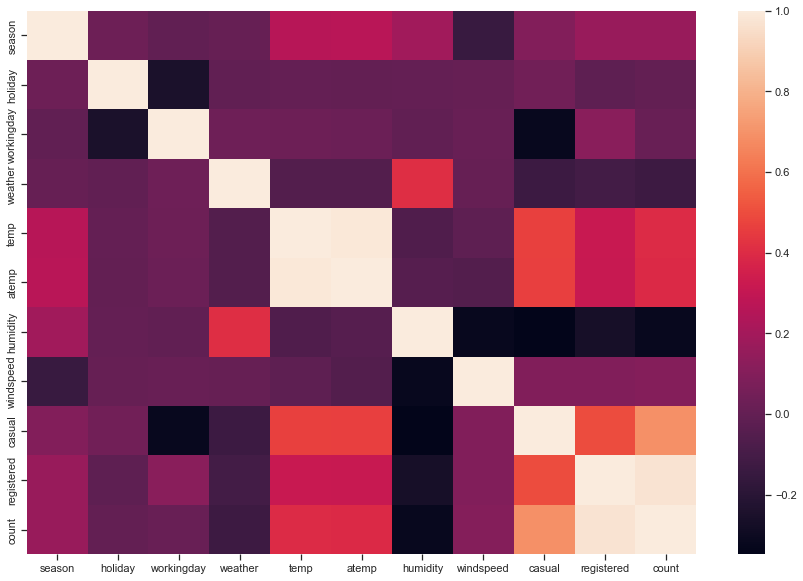

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(bikes.corr())

In [46]:
# gives the degree of correlation
c = bikes.corr()
s = c.unstack()
so = s.sort_values(kind="quicksort")

casual      humidity      False
humidity    casual        False
casual      workingday    False
workingday  casual        False
windspeed   humidity      False
                          ...  
weather     weather       False
workingday  workingday    False
holiday     holiday       False
registered  registered    False
count       count         False
Length: 121, dtype: bool

In [ ]:
# Plot features as a functio of time after sum the times per day
downsampled = bikes.resample('M').mean()
downsampled.head()

In [ ]:
downsampled.shape[1]
downsampled.columns[0]
downsampled['holiday'].unique

In [ ]:


sns.set(style="ticks")
fig, ax = plt.subplots(8)
fig.tight_layout()

g1 = sns.barplot(x=downsampled.index, y = downsampled["weather"],data = downsampled, ax=ax[0])
#g1.set(xlabel ="",ylabel = "Weather", title ='Weather')
g2 = sns.lineplot(x=downsampled.index, y = downsampled["temp"],data = downsampled, ax=ax[1])
g3 = sns.lineplot(x=downsampled.index, y = downsampled["atemp"],data = downsampled, ax=ax[2])
g4 = sns.lineplot(x=downsampled.index, y = downsampled["humidity"],data = downsampled, ax=ax[3])
g5 = sns.lineplot(x=downsampled.index, y = downsampled["windspeed"],data = downsampled, ax=ax[4])
g6 = sns.lineplot(x=downsampled.index, y = downsampled["casual"],data = downsampled, ax=ax[5])
g7 = sns.lineplot(x=downsampled.index, y = downsampled["registered"],data = downsampled, ax=ax[6])
g8 = sns.lineplot(x=downsampled.index, y = downsampled["count"],data = downsampled, ax=ax[7])


In [ ]:

downsampled.describe()


In [ ]:
# Basic correlogram for a spcific month
F = downsampled.loc[]
F
sns.pairplot(F) 


# See results per day / week


In [ ]:
bikes.head(2)